In [1]:
# Import NumPy library
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


some text before
<details>
<summary>Click to expand the description!</summary>

This Jupyter notebook demonstrates the basics of numerical operations in Python using NumPy. We will load the necessary NumPy library in one cell and compute the sine function for a range of values from 0 to \(2\pi\) in the next.

</details>

In [2]:
def create_nx_graph(graph_dict, graph_type=''):
    """
    Create a NetworkX graph object from a dictionary representation of a graph.
    
    :param graph_dict: dict, Dictionary containing graph information.
                       Nodes are keys, values are another dict where keys are connected nodes and values are edge weights.
    :param graph_type: str, '1dir' to create a directed graph, '2dir' to create an undirected graph.
    :return: NetworkX graph object
    """
    if graph_type == 'dir':
        G = nx.DiGraph()  # Create an empty Directed Graph object
    else: 
        G = nx.Graph()  # Create an empty Graph object
    
    # Add nodes and edges to the graph
    for node, connections in graph_dict.items():
        G.add_node(node, weight=connections.pop('weight', None))  # Add node with weight if it exists
        for connected_node, weight in connections.items():
            G.add_edge(node, connected_node, weight=weight)  # Add edge with weight
    
    return G

# Example usage:
    
# Creating an undirected graph
#G_ud = create_nx_graph(graph_dict)

# Creating a directed graph
#G_1d = create_nx_graph(graph_dict, 'dir')


In [3]:
def print_graph(G,txt=''):
    """
    Print the nodes with weights and the edges with weights of a NetworkX graph object.
    
    :param G: NetworkX graph object
    """
    # Printing nodes with weights
    print("\n"+txt+" Nodes with weights ")
    for node, data in G.nodes(data=True):
        print(f"Node: {node}, Weight: {data['weight']}")

    is1d=isinstance(G, nx.DiGraph)
    # Printing edges with weights
    if is1d: print("Edges (1-directional) with weights:") 
    else: print("Edges (uni-directional) with weights:")
    for u, v, weight in G.edges(data='weight'):
        print(f"edge: ({u}, {v}), weight: {weight}")

# Using the function to display nodes with weights and edges with weights of the graph G
#print_graph(G_ud)

In [4]:
def draw_custom_graph(G, ax):
    """
    Draw the graph on a specified matplotlib axis.
    
    :param G: NetworkX graph object
    :param ax: Matplotlib axis
    """
    #pos = nx.spring_layout(G)  # Define the layout
    pos = nx.drawing.layout.planar_layout(G)  

    #pos = nx.drawing.nx_pydot.pydot_layout(G, prog='dot')  # tree from top
    is1d=isinstance(G, nx.DiGraph)
    print('pos:',pos,type(pos), 'is1d=',is1d)
    
    # Determine node colors and shapes based on graph type
    node_color = 'lightblue' if is1d else 'yellow'
    node_shape = 'o' if is1d  else 's'
    
    # Draw nodes with size 500
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500, node_shape=node_shape, edgecolors='black', linewidths=1, ax=ax)
    
    # Draw edges with arrow heads
    #nx.draw_networkx_edges(G, pos, arrows=True, ax=ax)
   
    # Draw edges with arrowstyle based on graph type, ensuring arrows are not hidden
    if is1d:
         nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, ax=ax)#, connectionstyle='arc3,rad=-0.3')
    else:      
        nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=20, ax=ax)
        
    # Draw labels inside nodes
    nx.draw_networkx_labels(G, pos, font_weight='bold', font_color='black', ax=ax)

    # Draw node weights
    node_weight = nx.get_node_attributes(G, 'weight')
    print('nn', node_weight)
    for nn in node_weight: 
        #print('zzz',pos[nn],str(node_weight[nn]))
        x0,y0=pos[nn]#+(0.07,.07)
        print('pp',nn,x0,x0)
        ax.text(x0+0.05,y0+0.01 ,str(node_weight[nn]))

    # Draw edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

    tit='' if is1d else 'directed'
    ax.set_title('Graph '+tit)
    ax.axis('off')  # Turn off the axis

# Example usage:
if 0:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a canvas with 2 axes
    draw_custom_graph(G_cn, axs[0])  # Draw on the first axis
    plt.tight_layout()
    plt.show()

In [5]:
# INPUT : CN compute nodes & TASKS for : 2C_3T_2E
graph_CN = {
    "C0": {"weight": 1,"C1": 4} ,
    "C1": {"weight": 2,"C0": 4}
}
graph_TASK = {
    "T0": { "weight": 3,"T1": 2,"T2": 20,},
    "T1": {"weight": 10},
    "T2": {"weight": 4}
}

In [6]:
if 1: # INPUT : CN compute nodes & TASKS for : 3C_2T_1E
    graph_CN = {
        "C0": {"weight": 5,"C1": 3} ,
        "C1": {"weight": 2,"C0": 3,"C2": 4},
        "C2": {"weight": 1,"C1": 4}
    }
    graph_TASK = {
        "T0": { "weight": 7,"T1": 5},
        "T1": {"weight": 8}
    }

In [7]:
G_cn = create_nx_graph(graph_CN)
G_t = create_nx_graph(graph_TASK, 'dir')
print_graph(G_cn,'Compute ')
print_graph(G_t,'Tasks ')

# G_t["t0"] returns an AtlasView, which is a view into the adjacency dictionary for the node "t0". 
# G_t.nodes["t0"]['weight']  returns node weight


Compute  Nodes with weights 
Node: C0, Weight: 5
Node: C1, Weight: 2
Node: C2, Weight: 1
Edges (uni-directional) with weights:
edge: (C0, C1), weight: 3
edge: (C1, C2), weight: 4

Tasks  Nodes with weights 
Node: T0, Weight: 7
Node: T1, Weight: 8
Edges (1-directional) with weights:
edge: (T0, T1), weight: 5


pos: {'C0': array([-1.        , -0.33333333]), 'C1': array([ 1.        , -0.33333333]), 'C2': array([0.        , 0.66666667])} <class 'dict'> is1d= False
nn {'C0': 5, 'C1': 2, 'C2': 1}
pp C0 -1.0 -1.0
pp C1 1.0 1.0
pp C2 0.0 0.0
pos: {'T0': array([-1.,  0.]), 'T1': array([1., 0.])} <class 'dict'> is1d= True
nn {'T0': 7, 'T1': 8}
pp T0 -1.0 -1.0
pp T1 1.0 1.0


/tmp/ipykernel_18/4173005992.py:27: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, ax=ax)#, connectionstyle='arc3,rad=-0.3')


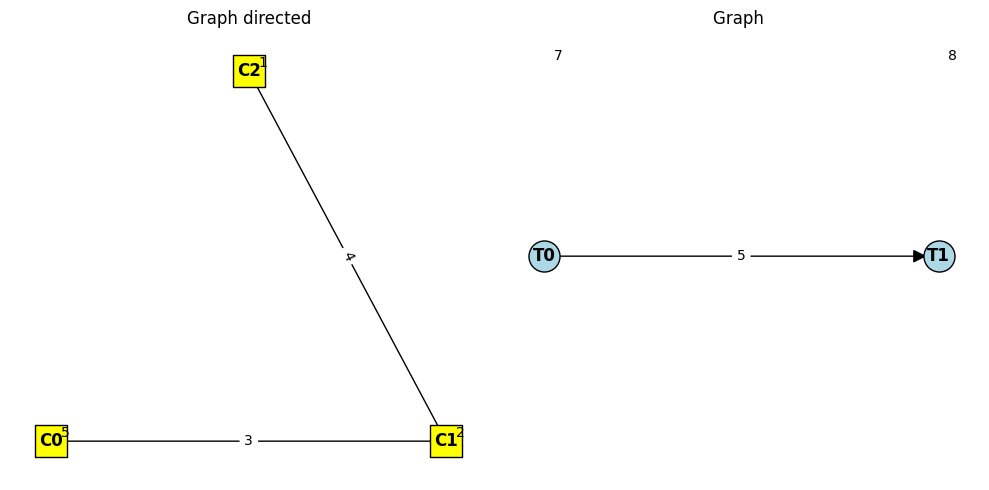

In [8]:
# Example usage:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a canvas with 2 axes
draw_custom_graph(G_cn, axs[0])  # Draw on the first axis
draw_custom_graph(G_t, axs[1])  # Draw on the second axis
plt.tight_layout()
plt.show()

In [9]:
# itemize cost 
if 1:
    nTask=len(G_t)
    nCN=len(G_cn)
    nAtom=nTask*nCN
    print('nTask=%d, nCN=%d, nAtom=%d'%(nTask,nCN,nAtom))

    computeCost={}    
    for tN in G_t:        
        work=G_t.nodes[tN]['weight']
        for cN in G_cn:
            price=G_cn.nodes[cN]['weight']
            #print(iC,'CN:',tN,price)
            computeCost[(cN,tN)]=price*work
    print('computeCost(C-T): ');pprint(computeCost)

    transferCost={}
    for tN in G_t:  
        tDesc=G_t[tN]
        if len(tDesc)==0: continue
        dNL=sorted(tDesc)
        #print('task desc:',tN,dNL)
        for tM in dNL:
            coal=tDesc[tM]['weight']
            #print(tM,coal)
            for iC,cN in enumerate(G_cn):
                cDesc=G_cn[cN]
                #print(cN,'cDes:',cDesc)
                cNL=sorted(cDesc)
                for cM in cNL:
                    price=cDesc[cM]['weight']
                    #print(cN,cM,price,coal,price*coal)
                    transferCost[((cN,tN),(cM,tM))]=coal*price
    print('transferCost(C-T,C-T): ');pprint(transferCost)


nTask=2, nCN=3, nAtom=6
computeCost(C-T): 
{('C0', 'T0'): 35,
 ('C0', 'T1'): 40,
 ('C1', 'T0'): 14,
 ('C1', 'T1'): 16,
 ('C2', 'T0'): 7,
 ('C2', 'T1'): 8}
transferCost(C-T,C-T): 
{(('C0', 'T0'), ('C1', 'T1')): 15,
 (('C1', 'T0'), ('C0', 'T1')): 15,
 (('C1', 'T0'), ('C2', 'T1')): 20,
 (('C2', 'T0'), ('C1', 'T1')): 20}


In [10]:
# index atoms and constraints
if 1:    
    i=0
    atomId={}
    xorConstr=set()
    for tN in G_t:
        xors=()
        for cN in G_cn:
            atomId[(cN,tN)]=i 
            xors+=(i,)
            i+=1
        xorConstr.add(xors)
    print('atomId(C-T):'); pprint(atomId)
    print('xorConstr:'); pprint(xorConstr)

atomId(C-T):
{('C0', 'T0'): 0,
 ('C0', 'T1'): 3,
 ('C1', 'T0'): 1,
 ('C1', 'T1'): 4,
 ('C2', 'T0'): 2,
 ('C2', 'T1'): 5}
xorConstr:
{(0, 1, 2), (3, 4, 5)}


In [11]:
# itemized cost to QUBO
if 1:
   eneOne={}  # one atom energy
   for ctN in  computeCost:
       aid=atomId[ctN]
       eneOne[aid]=computeCost[ctN]
   print('eneOne(aid):'); pprint(eneOne)
   enePair={}  # atom-pair  energy
   for ctN1,ctN2 in transferCost:
       #continue
       aid1,aid2=atomId[ctN1],atomId[ctN2]
       enePair[(aid1,aid2)]=transferCost[(ctN1,ctN2)]
   print('enePair(aid-aid):'); pprint(enePair)  
    
   # ..... add constraint energy
   def xor2(a,b): # 2*a*b -a -b
       myCost=100       
       return { (a,b):2*myCost}, {a:-myCost , b:-myCost }
   def xor3(a,b,c): # 2ab + 2ac +2bc  -a -b -c
       myCost=50       
       return {(a,b):2*myCost, (a,c):2*myCost, (b,c):2*myCost} ,{a:-myCost , b:-myCost , c:-myCost }

   for ab in xorConstr:
       bill2L,bill1L=xor3(*ab)
       print(bill2L,bill1L )
       for aaid in bill2L:
           if aaid not in enePair: enePair[aaid]=0
           enePair[aaid]+=bill2L[aaid]    
       for aid in bill1L:
           if aid not in eneOne: eneOne[aid]=0
           eneOne[aid]+=bill1L[aid]
           
   print('\nFinal eneOne(aid):'); pprint(eneOne) 
   print('Final enePair(aid-aid):'); pprint(enePair)  

eneOne(aid):
{0: 35, 1: 14, 2: 7, 3: 40, 4: 16, 5: 8}
enePair(aid-aid):
{(0, 4): 15, (1, 3): 15, (1, 5): 20, (2, 4): 20}
{(0, 1): 100, (0, 2): 100, (1, 2): 100} {0: -50, 1: -50, 2: -50}
{(3, 4): 100, (3, 5): 100, (4, 5): 100} {3: -50, 4: -50, 5: -50}

Final eneOne(aid):
{0: -15, 1: -36, 2: -43, 3: -10, 4: -34, 5: -42}
Final enePair(aid-aid):
{(0, 1): 100,
 (0, 2): 100,
 (0, 4): 15,
 (1, 2): 100,
 (1, 3): 15,
 (1, 5): 20,
 (2, 4): 20,
 (3, 4): 100,
 (3, 5): 100,
 (4, 5): 100}


In [12]:
def atom_graph_from_edge_energy(edgePair,base4um=100):
    """
    Create a graph from a dictionary of edge pairs with weights.

    :param edgePair: Dictionary with (node1, node2) tuples as keys and edge length as values
    :return: A NetworkX graph object
    """
    G = nx.Graph()
    for (node1, node2), energy in edgePair.items():
        length=4 * np.power(base4um/energy,1/.6)
        length=float('%.1f'%length)
        G.add_edge(node1, node2, length=length)
    return G
GenePair=atom_graph_from_edge_energy(enePair) 



The graph is not planar and cannot be drawn without edges crossing.


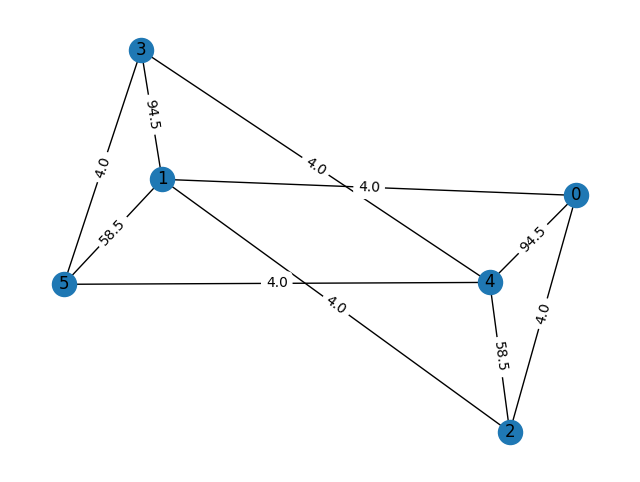

In [13]:
def draw_atom_graph_to_scale(G, ax):
    """
    Draw the graph to scale on a specified matplotlib axis.

    :param G: NetworkX graph object
    :param ax: Matplotlib axis
    """
    # Check if the graph is planar
    is_planar, embedding = nx.check_planarity(G)
    is_planar=False
    if is_planar:
        print("The graph is planar and can be drawn without edges crossing.")
        pos = nx.planar_layout(G)
        # Now you can use 'pos' to draw the graph with plt or with nx.draw
    else:
        print("The graph is not planar and cannot be drawn without edges crossing.")
        pos = nx.spring_layout(G, weight='length', scale=1)  # Get positions for all nodes

    # Draw the graph
    nx.draw(G, pos, with_labels=True, ax=ax)

    # Draw edge labels to show the weights (edge lengths)
    edge_labels = nx.get_edge_attributes(G, 'length')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

# Example usage:
G=GenePair
fig, ax = plt.subplots(figsize=(8, 6))
draw_atom_graph_to_scale(G, ax)
plt.show()


In [14]:
sorted(GenePair)
GenePair[0]

AtlasView({4: {'length': 94.5}, 1: {'length': 4.0}, 2: {'length': 4.0}})